### Preprocessing

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df=pd.read_csv('dementia_dataset.csv')
df = pd.DataFrame(df)


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df['Group'].unique()


array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [7]:
df=df.replace('Nondemented', 0).replace('Demented', 1).replace('Converted',2)


In [8]:
df1=df.drop(['Subject ID', 'MRI ID'], axis=1)
df1


,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,1,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,1,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [9]:
df1= pd.get_dummies(df1)
df1

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M,Hand_R
0,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,False,True,True
1,0,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,False,True,True
2,1,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046,False,True,True
3,1,2,560,76,12,NaN,28.0,0.5,1738,0.713,1.010,False,True,True
4,1,3,1895,80,12,NaN,22.0,0.5,1698,0.701,1.034,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,82,16,1.0,28.0,0.5,1693,0.694,1.037,False,True,True
369,1,3,2297,86,16,1.0,26.0,0.5,1688,0.675,1.040,False,True,True
370,0,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,True,False,True
371,0,2,763,63,13,2.0,30.0,0.0,1327,0.796,1.323,True,False,True


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df1)
df_normalized = pd.DataFrame(df_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.00,0.000000,0.710526,0.470588,0.25,0.884615,0.00,0.981069,0.269430,0.009845,0.0,1.0,0.0
1,0.0,0.25,0.173172,0.736842,0.470588,0.25,1.000000,0.00,1.000000,0.191710,0.000000,0.0,1.0,0.0
2,0.5,0.00,0.000000,0.394737,0.352941,NaN,0.730769,0.25,0.636971,0.476684,0.239100,0.0,1.0,0.0
3,0.5,0.25,0.212202,0.421053,0.352941,NaN,0.923077,0.25,0.703786,0.357513,0.188467,0.0,1.0,0.0
4,0.5,0.50,0.718075,0.526316,0.352941,NaN,0.692308,0.25,0.659243,0.295337,0.222222,0.0,1.0,0.0


In [11]:
df_final = df_normalized.copy()
for col in df_final.columns:
    median_value = df_final[col].median()  # Calcula la mediana
    df_final[col].fillna(median_value, inplace=True)  # Reemplaza NaN por la mediana
    
df_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.00,0.000000,0.710526,0.470588,0.25,0.884615,0.00,0.981069,0.269430,0.009845,0.0,1.0,0.0
1,0.0,0.25,0.173172,0.736842,0.470588,0.25,1.000000,0.00,1.000000,0.191710,0.000000,0.0,1.0,0.0
2,0.5,0.00,0.000000,0.394737,0.352941,0.25,0.730769,0.25,0.636971,0.476684,0.239100,0.0,1.0,0.0
3,0.5,0.25,0.212202,0.421053,0.352941,0.25,0.923077,0.25,0.703786,0.357513,0.188467,0.0,1.0,0.0
4,0.5,0.50,0.718075,0.526316,0.352941,0.25,0.692308,0.25,0.659243,0.295337,0.222222,0.0,1.0,0.0


### First SVM results

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros encontrados: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        52
           1       0.90      0.96      0.93        46
           2       0.50      0.14      0.22        14

    accuracy                           0.87       112
   macro avg       0.75      0.69      0.69       112
weighted avg       0.83      0.87      0.83       112


Matriz de confusión:


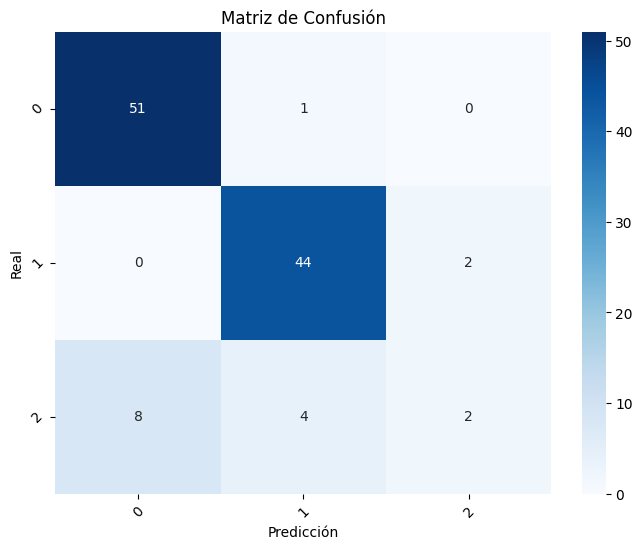


Precisión en el conjunto de prueba: 0.8660714285714286


In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

class_enc = LabelEncoder()
df[0] = class_enc.fit_transform(df[0])

X = df.iloc[:, 1:]  
y = df.iloc[:, 0] 

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo con One-vs-Rest
svm_model = SVC(probability=True, decision_function_shape='ovr')

# Definir la búsqueda de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# Realizar la búsqueda de hiperparámetros
gs = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
gs.fit(X_train, y_train)

print(f"Mejores parámetros encontrados: {gs.best_params_}")

# Evaluar el modelo
svm_model_final = gs.best_estimator_
y_pred = svm_model_final.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
cm= confusion_matrix(y_test, y_pred)
# Crear el gráfico con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True, 
            xticklabels=class_enc.classes_, yticklabels=class_enc.classes_)

# Mejorar la apariencia
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Mostrar el gráfico
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión en el conjunto de prueba: {accuracy}")


### One vs One


In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

class_enc = LabelEncoder()
df[0] = class_enc.fit_transform(df[0])

X = df.iloc[:, 1:]  
y = df.iloc[:, 0] 

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo con One-vs-Rest
svm_model = SVC(probability=True, decision_function_shape='ovr')

# Definir la búsqueda de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# Realizar la búsqueda de hiperparámetros
gs = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
gs.fit(X_train, y_train)

print(f"Mejores parámetros encontrados: {gs.best_params_}")

# Evaluar el modelo
svm_model_final = gs.best_estimator_
y_pred = svm_model_final.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión en el conjunto de prueba: {accuracy}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros encontrados: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        52
           1       0.90      0.96      0.93        46
           2       0.50      0.14      0.22        14

    accuracy                           0.87       112
   macro avg       0.75      0.69      0.69       112
weighted avg       0.83      0.87      0.83       112


Matriz de confusión:
[[51  1  0]
 [ 0 44  2]
 [ 8  4  2]]

Precisión en el conjunto de prueba: 0.8660714285714286


### First Random Forest Results


In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

df = df_final  

class_enc = LabelEncoder()
df[0] = class_enc.fit_transform(df[0])

X = df.iloc[:, 1:]  
y = df.iloc[:, 0]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5]
}

gs = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
gs.fit(X_train, y_train)

print(f"Mejores parámetros encontrados: {gs.best_params_}")

scores_rf = cross_val_score(gs.best_estimator_, X, y, cv=10, scoring='accuracy', n_jobs=-1)

print(f"Cross-validation scores: {scores_rf}")
print(f"Promedio de los scores de cross-validation: {scores_rf.mean()}")

svm_rf_final = gs.best_estimator_

y_pred = svm_rf_final.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión en el conjunto de prueba: {accuracy}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros encontrados: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Cross-validation scores: [0.89473684 0.89473684 0.89473684 0.89189189 0.94594595 0.91891892
 0.91891892 0.89189189 0.89189189 0.86486486]
Promedio de los scores de cross-validation: 0.9008534850640114

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.88      0.96      0.92        46
           2       0.40      0.14      0.21        14

    accuracy                           0.86       112
   macro avg       0.72      0.69      0.68       112
weighted avg       0.82      0.86      0.83       112


Matriz de confusión:
[[50  1  1]
 [ 0 44  2]
 [ 7  5  2]]

Precisión en el conjunto de prueba: 0.8571428571428571


### Converted Are Non Demented

In [21]:
y_binary = y.replace({1: 1, 2: 1})  # Clases 1 y 2 se convierten en 1

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

df = df_final

class_enc = LabelEncoder()
df[0] = class_enc.fit_transform(df[0])

X = df.iloc[:, 1:]  
y = df.iloc[:, 0]   

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

svm_model = SVC(probability=True)

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001],  
    'kernel': ['linear', 'rbf','poly'] 
}

gs = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
gs.fit(X_train, y_train)

print(f"Mejores parámetros encontrados: {gs.best_params_}")

scores_svc = cross_val_score(gs.best_estimator_, X, y, cv=10, scoring='accuracy', n_jobs=-1)

print(f"Cross-validation scores: {scores_svc}")
print(f"Promedio de los scores de cross-validation: {scores_svc.mean()}")

svm_model_final = gs.best_estimator_

y_pred = svm_model_final.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión en el conjunto de prueba: {accuracy}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores parámetros encontrados: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Cross-validation scores: [0.86842105 0.89473684 0.92105263 0.91891892 0.86486486 0.91891892
 0.91891892 0.89189189 0.89189189 0.89189189]
Promedio de los scores de cross-validation: 0.8981507823613086

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        52
           1       0.98      0.87      0.92        60

    accuracy                           0.92       112
   macro avg       0.92      0.92      0.92       112
weighted avg       0.93      0.92      0.92       112


Matriz de confusión:
[[51  1]
 [ 8 52]]

Precisión en el conjunto de prueba: 0.9196428571428571


In [23]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

df = df_final  

class_enc = LabelEncoder()
df[0] = class_enc.fit_transform(df[0])

X = df.iloc[:, 1:]  
y = df.iloc[:, 0]   

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5]
}

gs = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
gs.fit(X_train, y_train)

print(f"Mejores parámetros encontrados: {gs.best_params_}")

scores_rf = cross_val_score(gs.best_estimator_, X, y, cv=10, scoring='accuracy', n_jobs=-1)

print(f"Cross-validation scores: {scores_rf}")
print(f"Promedio de los scores de cross-validation: {scores_rf.mean()}")

svm_rf_final = gs.best_estimator_

y_pred = svm_rf_final.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión en el conjunto de prueba: {accuracy}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros encontrados: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Cross-validation scores: [0.86842105 0.89473684 0.92105263 0.89189189 0.91891892 0.91891892
 0.89189189 0.91891892 0.89189189 0.86486486]
Promedio de los scores de cross-validation: 0.8981507823613087

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        52
           1       0.98      0.87      0.92        60

    accuracy                           0.92       112
   macro avg       0.92      0.92      0.92       112
weighted avg       0.93      0.92      0.92       112


Matriz de confusión:
[[51  1]
 [ 8 52]]

Precisión en el conjunto de prueba: 0.9196428571428571
